# Construindo um grafo automaticamente

> <hr>

## Introdução

Neste notebook nós vamos dar o primeiro passo para construir nossa rede neural artificial. Neste primeiro passo, nós vamos criar uma classe que gera automaticamente o nosso `grafo computacional`. O grafo computacional é o grafo que representa todas as operações matemáticas que ocorreram ao se computar um certo valor $y$. O grafo computacional é um passo necessário pois será baseado nele que iremos computar os gradientes locais necessários para realizar o `backpropagation`.



> <hr>

## Importações



In [1]:
from funcoes import plota_grafo # função criada por Andrej Karpathy

In [2]:
try:
    import graphviz # necessária a instalação de um software para seu uso adequado
except ModuleNotFoundError:
    import sys
    !{sys.executable} -m pip install graphviz

## Código e Discussão

<br>

### PRIMEIROS PASSOS ----

A base de tudo será uma classe chamada `Valor`. Vamos começar pelo básico!



In [3]:
class Valor:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Valor(data={self.data})"

> <div style=' text-align: justify; text-justify: inter-word;'> Criando uma classe aqui, bem como visto no experimento 02, e já considerando os métodos de Dunder, feitos especificamente ao Python.

Vamos testar nossa classe!



In [34]:
x1 = Valor(60)
print(x1)
print(x1.data) # lembrando da importância do ponto final
                # permite acessar o dado 'guardado' pelo objeto

Valor(data=60)
60


<br>

### OS DUNDER `__add__` e `__mul__` ----

Observe que não conseguimos adicionar nem multiplicar objetos criados com a classe `Valor`.



In [4]:
a = Valor(10)
b = Valor(5)

In [5]:
print(a + b)

TypeError: unsupported operand type(s) for +: 'Valor' and 'Valor'

> O que é óbvio para nós, não é óbvio para o computador: nós sabemos que se trata de um valor numérico, o Python não. Sendo assim, como ele vai somar dois objetos de classe Valor?

In [7]:
print(a * b)

TypeError: unsupported operand type(s) for *: 'Valor' and 'Valor'

> Aqui, a mesma coisa, como o Python vai multiplicar dois objetos de classe Valor quando ele não entende que cada um desses objetos corresponde a um valor numérico específico? Essa informação precisa ser contada para o programa.

Ué&#x2026; porque não conseguimos? Não conseguimos pois o Python (ainda) não é vidente. Ele lá vai saber como adicionar ou multiplicar algo que você criou? Pra você parece óbvio que valores podem ser adicionados ou multiplicados, mas para o Python ele nem sabe o que significa a palavra `Valor`&#x2026;

Como sempre, temos que contar para o programa o que queremos que aconteça quando usarmos os operadores `+` e `*`. Quem faz isso são os dunders `__add__` e `__mul__`.



> Lembrando, a classe 'Valor' é uma receita, ela conta como se cria um objeto. Fazendo o uso dos métodos, estaremos usando a classe nela mesma.

In [9]:
class Valor:
    def __init__(self, data): # criando um objeto
        self.data = data

    def __repr__(self): # representando um objeto
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor): # indicam a ação que deve ser feito, ou seja, ele vai somar
        saida = Valor(self.data + outro_valor.data)
        return saida
    # vai usar a soma para criar um novo objeto
    # vai criar um objeto com base na receita (classe valor)

    def __mul__(self, outro_valor): # indicam a ação que deve ser feita, ou seja, estamos ensinando ele
        saida = Valor(self.data * outro_valor.data)
        return saida

Vamos testar!



In [11]:
a = Valor(10)
b = Valor(5)

print(a+b)
print()
print(a * b)
print()

Valor(data=15)

Valor(data=50)



<br>

### REGISTRANDO OS PROGENITORES ----

Nosso objetivo é construir um grafo computacional. Em um grafo computacional, um certo vértice pode ter um ou mais vértices progenitores (são seus pais/mães). Nós não podemos perder essa informação quando formos construir um grafo, então precisamos incluir essa informação na nossa classe.



In [15]:
class Valor:
    def __init__(self, data, progenitor=()):
        self.data = data
        self.progenitor = progenitor

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        saida = Valor(data, progenitor)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        saida = Valor(data, progenitor)
        return saida

> Aqui, estamos contando para a classe que o valor novo calculado vem de duas outras instâncias que já são conhecidas! Fica mais fácil se pensarmos nisso com a representação pelos grafos, que estará disposta no final do notebook.

Vamos testar!



In [18]:
# valores definifos previamente
a = Valor(10)
b = Valor(5)

print(a.data)
print(a.progenitor) # sabemos que não tem

print()

c = a + b
print(c.data)
print(c.progenitor)

print()

10
()

15
(Valor(data=10), Valor(data=5))



> <div style=' text-align: justify; text-justify: inter-word;'> Aqueles valores que são definidos por quem escreve o código, logo no início do processo, não possuem progenitores. Por outro lado, eles são progenitores de outros valores, como 'a' e 'b' foram de 'c'.

<br>

### REGISTRANDO O OPERADOR MÃE ----

Em um grafo computacional, um vértice pode ter um operador mãe. O operador mãe é o operador que foi usado para gerar o vértice.



In [20]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+" # registra a informação de qual operação foi realizada
        saida = Valor(data, progenitor, operador_mae)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*" # aqui também registra a informação de qual operação foi realizada
        saida = Valor(data, progenitor, operador_mae)
        return saida

> Não se pode perder a informação de qual foi a operação realizada. Para não perder, se registra na classe e registramos isso por meio de alterações no estado.Informações que não podem ser perdidas precisam ser registradas.

Vamos testar!



In [25]:
a = Valor(10)
b = Valor(5)

print(a.data)
print(a.progenitor) # sabemos que não tem

print()

c = a + b
print(c.data)
print(c.progenitor)

print()

print('O operador mãe de c é:', c.operador_mae)
print('O operador mãe de a é:', a.operador_mae) # sabemos que não terá nada, pois o a não foi criado, o valor já estava definido

print()

10
()

15
(Valor(data=10), Valor(data=5))

O operador mãe de c é: +
O operador mãe de a é: 



> <div style=' text-align: justify; text-justify: inter-word;'> Os operadores mãe são bem literalmente operadores matemáticos, eles que definem e que nos contam qual tipo de operação está sendo realizada.

<br>

### PLOTANDO O PRIMEIRO GRAFO ----

Vamos plotar nosso primeiro grafo!



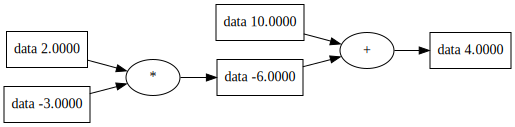

In [26]:
a = Valor(2)
b = Valor(-3)
c = Valor(10)

d = a * b
e = d + c

plota_grafo(e)

> <div style=' text-align: justify; text-justify: inter-word;'> De maneira prática, podemos descrever grafos como recursos não somente visuais (mas também), compostos por vértices e arestas interligados interconectados segundo o que deseja representar. Esse grafo está ilustrando quais são as expressões matemáticas e os valores gerados por elas. Isso é muito legal de se perceber e é uma ferramenta valiosa também.

<br>

### REGISTRANDO O RÓTULO ----

Nosso grafo seria mais legível se tivéssemos rótulos indicando o que é cada vértice. Vamos incluir essa informação na nossa classe.



In [27]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo # apenas criou-se uma propriedade nova, não mudamos mais nada

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+"
        saida = Valor(data, progenitor, operador_mae)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*"
        saida = Valor(data, progenitor, operador_mae)
        return saida

> <div style=' text-align: justify; text-justify: inter-word;'> Aqui, estamos nomeando os pontos dos grafos, isso é ainda mais relevante quando pensamos em representar equações.

Vamos testar!



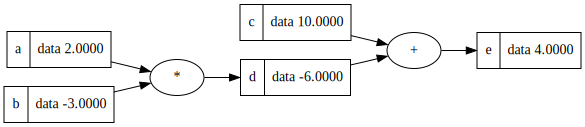

In [31]:
a = Valor(2, rotulo="a")
b = Valor(-3, rotulo="b")
c = Valor(10, rotulo="c")

d = a * b
e = d + c

# mudamos na mão, porque o pyhton não saberá o rótulo sozinho
d.rotulo = "d"
e.rotulo = "e"

plota_grafo(e)

In [32]:
grafo = plota_grafo(e)
print(grafo)

# podemos pegar o resultado disso aqui e plotar o grafo no site disponibilizado pelo professor
# link = https://dreampuf.github.io/GraphvizOnline/
# útil caso não tenha o software instalado/disponível

digraph {
	graph [rankdir=LR]
	2299277968960 [label="{ d | data -6.0000 }" shape=record]
	"2299277968960*" [label="*"]
	"2299277968960*" -> 2299277968960
	2299277968480 [label="{ a | data 2.0000 }" shape=record]
	2299277970256 [label="{ b | data -3.0000 }" shape=record]
	2299277969248 [label="{ e | data 4.0000 }" shape=record]
	"2299277969248+" [label="+"]
	"2299277969248+" -> 2299277969248
	2299277967760 [label="{ c | data 10.0000 }" shape=record]
	2299277967760 -> "2299277969248+"
	2299277968480 -> "2299277968960*"
	2299277970256 -> "2299277968960*"
	2299277968960 -> "2299277969248+"
}



> <hr>

> ### REFAZENDO O GRAFO QUE FIZEMOS NA AULA ANTERIOR

Na aula anterior nós fizemos um grafo computacional para aprender como funciona o backpropagation. Vamos refazer ele aqui!



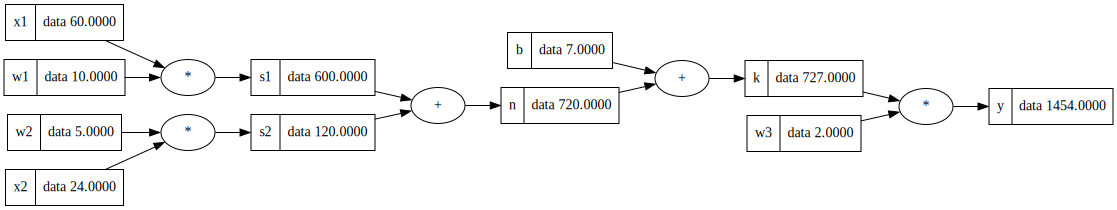

In [33]:
# valores que já havíamos definido na aula anterior
x1 = Valor(60, rotulo = "x1")
x2 = Valor(24, rotulo = "x2")

w1 = Valor(10, rotulo = "w1")
w2 = Valor(5, rotulo = "w2")
w3 = Valor(2, rotulo = "w3")

b = Valor(7, rotulo = "b")

# expressões que havíamos já definido na aula anterior (primeira aula de redes neurais)
s1 = x1 * w1
s1.rotulo = "s1"

s2 = x2 * w2
s2.rotulo = "s2"

n = s1 + s2
n.rotulo = "n"

k = n + b
k.rotulo = "k"

y = k * w3
y.rotulo = "y"

plota_grafo(y)

> <hr>

## Conclusão

<div style=' text-align: justify; text-justify: inter-word;'>
    A visualização por meio de grafos é uma ótima estratégia para entender informações que podem tomar formas complexas e isso não costuma ser feito somente na área da programação. No nosso contexto específico, é interessante estudar as ferramentas e opções que o próprio Python oferece para a elaboração dos mesmos.
    
</div>

<hr>

## Playground

#### Como eu entendo que os grafos facilitam a visualização do backpropagation?
<br> `RESPOSTA`: o backpropagation chega ao fim de um processo e retorna até o início, de trás para a frente. Os grafos permitem que se enxergue o passo a passo nas duas direções e, para mim, impede que você se perca em alguma parte do todo, já que há um suporte visual conutndente.